This Project is about Getting IMDB from excel sheet , then upload this data to MongoDB to clean and fix it, then merge it with Metacritic data and applied line regression analysis by using Pandas and matplotlib


Connect Jupyter notebook to MongoDB through Json file

In [1]:
import json

# Demonstration of how to load a file that contains secrets without accidentally leaking those secrets
with open('credentials.json') as f:
    creds = json.load(f)

    # If you want your data to be secure, don't print this variable out!
    # Jupyter will retain a cached version of any printed data and it can be
    # accidentally committed to version control.
    secret_key = creds['mongodb']

# We can safely print the length of the secret key. That won't leak any sensitive information.
print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 110 characters in length.


Fetch data from Monogo DB and connect Jupyter to Imdb database

In [2]:
from pymongo import MongoClient
import certifi
import pandas as pd
from datetime import datetime

client = MongoClient(creds["mongodb"])


# my Database on Mongo Campas is Imdb and i is capital
db = client["Imdb"]

#collection name is imdb small i
collection = db.list_collection_names()
print(collection)


['imdb2', 'Metacritic', 'IMDB_Pipeline_view']


Connect Jupyter to imdb and filter movies by release date by year 2000

In [3]:
from matplotlib import pyplot as plt
import re
import pandas as pd
from datetime import datetime

import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = db["IMDB_Pipeline_view"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)


# Convert the release_date column to datetime
imdb['release_date'] = pd.to_datetime(imdb['release_date'], errors='coerce')

# Filter for rows where the release year is 2000
imdb_2000 = imdb[imdb['release_date'].dt.year == 2000]

columns_to_display = ['title', 'release_date', 'user_rating', 'budget_new',"gross_sales_new2"]
imdb_2000[columns_to_display].head()


,title,release_date,user_rating,budget_new,gross_sales_new2
7032,Scary Movie,2000-07-07,6,19000000,278019771.0
7033,Memento,2000-09-05,8,9000000,39723096.0
7034,The Road to El Dorado,2000-03-31,6,95000000,76529181.0
7035,Snow Day,2000-01-29,5,13000000,62464731.0
7036,Proof of Life,2000-12-04,6,65000000,NaN


Connect Jupyter to Metacritic and filter movies by release date by year 2000

In [4]:
# Retrieve all records from a collection - this can be a large amount of data!
cursor2 = db["Metacritic"].find()

# Convert this information into a Pandas dataframe
metacritic = pd.DataFrame(cursor2)


# Convert the release_date column to datetime
metacritic['release_date'] = pd.to_datetime(metacritic['release_date'], errors='coerce')

# Filter for rows where the release year is 2000
metacritic_2000 = metacritic[metacritic['release_date'].dt.year == 2000]

# Display the filtered results
metacritic_2000.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,67364f526d467415bc2a215d,11234,"Crouching Tiger, Hidden Dragon",2000-12-08 08:00:00,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...
1,67364f526d467415bc2a2170,11253,Set Me Free,2000-04-14 07:00:00,"Set in 1963 Montreal, Lea Pool's coming-of-age...",80,https://static.metacritic.com/images/products/...
2,67364f526d467415bc2a215e,11235,Yi Yi,2000-10-06 07:00:00,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...
3,67364f526d467415bc2a2174,11257,High Fidelity,2000-03-31 08:00:00,"In this biting romantic comedy, Rob Gordon (Cu...",79,https://static.metacritic.com/images/products/...
4,67364f526d467415bc2a2177,11260,Praise,2000-06-23 07:00:00,A sex-charged relationship between an unfocuse...,79,https://static.metacritic.com/images/products/...


Merging two data sets together

In [5]:
unified_view = pd.merge(imdb_2000, metacritic_2000, how="inner", on="title")

unified_view.head()

,_id_x,budget,cast,certification,company,director,genres,gross_sales,id,opening_weekend,...,matching_certification,release_date_fixed,year,month,_id_y,movie_id,release_date_y,description,score,thumbnail
0,636afb7f3bc31743d94b495a,"$19,000,000 (estimated)","Carmen Electra, Dave Sheridan, Frank B. Moore,...","TV-MA, TV-14::(DLSV), R, TV-14","Dimension Films, Wayans Bros. Entertainment, G...",Keenen Ivory Wayans,Comedy,"$278,019,771",175142,"$42,346,669, 09 Jul 2000",...,[ R],2000-07-07,2000,7,67364f526d467415bc2a2236,11451,2000-07-07 07:00:00,"A comic spoof in the tradition of ""Airplane,"" ...",48,https://static.metacritic.com/images/products/...
1,636afc173bc31743d94b4994,"$95,000,000 (estimated)","Kevin Kline, Kenneth Branagh, Rosie Perez, Arm...",PG,"DreamWorks Animation, Dreamworks Pictures, Sta...","Bibo Bergeron, Don Paul, Jeffrey Katzenberg","Animation, Adventure, Comedy, Family, Fantasy,...","$76,529,181",138749,"$12,846,652, 02 Apr 2000",...,[],2000-03-31,2000,3,67364f526d467415bc2a222a,11439,2000-03-31 08:00:00,"When they win a map to El Dorado, the famous C...",51,https://static.metacritic.com/images/products/...
2,636afc6c3bc31743d94b49b5,"$13,000,000 (estimated)","Chris Elliott, Mark Webber, Jean Smart, Schuyl...","TV-PG::(DVD rating), TV-PG::(LV), PG","MFF Feature Film Productions, New Faction Pict...",Chris Koch,"Adventure, Comedy, Family","$62,464,731",184907,"$14,331,819, 13 Feb 2000",...,[ PG],2000-01-29,2000,1,67364f526d467415bc2a2289,11534,2000-02-11 08:00:00,When a school in upstate New York is snowed in...,34,https://static.metacritic.com/images/products/...
3,636afcb43bc31743d94b49d0,"$65,000,000 (estimated)","Meg Ryan, Russell Crowe, David Morse, Pamela R...",R,"Castle Rock Entertainment, Bel Air Entertainme...",Taylor Hackford,"Action, Drama, Thriller",None,228750,"$10,207,869, 10 Dec 2000",...,[],2000-12-04,2000,12,67364f526d467415bc2a2248,11469,2000-12-08 08:00:00,"Peter Bowman (Morse), an American engineer in ...",45,https://static.metacritic.com/images/products/...
4,636afcb73bc31743d94b49d1,"$76,000,000 (estimated)","Rene Russo, Jason Alexander, Piper Perabo, Ran...",PG,"Capella International, KC Medien, Tribeca Prod...",Des McAnuff,"Animation, Adventure, Comedy, Family, Fantasy",None,131704,"$6,814,270, 02 Jul 2000",...,[],2000-06-24,2000,6,67364f526d467415bc2a2279,11518,2000-06-30 07:00:00,Escaping the bounds of their two-dimensional c...,36,https://static.metacritic.com/images/products/...


In [6]:
import statsmodels.formula.api

unified_view['budget_new']=pd.to_numeric(unified_view['budget_new'].replace('[\$,]','',regex = True),errors='coerce')
unified_view['opening_new']=pd.to_numeric(unified_view['opening_new'].replace('[\$,]','',regex = True),errors='coerce')

ols_model = statsmodels.formula.api.ols(
    formula= "gross_sales_new2 ~  user_rating +budget_new + opening_new +votes + runtime ",
    data= unified_view).fit()
print(ols_model.summary())


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sadek\AppData\Local\Temp\ipykernel_30492\3404377549.py:3: SyntaxWarning: invalid escape sequence '\$'
  unified_view['budget_new']=pd.to_numeric(unified_view['budget_new'].replace('[\$,]','',regex = True),errors='coerce')
C:\Users\sadek\AppData\Local\Temp\ipykernel_30492\3404377549.py:4: SyntaxWarning: invalid escape sequence '\$'
  unified_view['opening_new']=pd.to_numeric(unified_view['opening_new'].replace('[\$,]','',regex = True),errors='coerce')


                            OLS Regression Results                            
Dep. Variable:       gross_sales_new2   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     62.15
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           7.97e-24
Time:                        18:55:21   Log-Likelihood:                -1398.2
No. Observations:                  73   AIC:                             2808.
Df Residuals:                      67   BIC:                             2822.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.653e+08   4.87e+07     -3.397      

In [8]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
text_to_analyze = "This movie was amazing!"
result = sentiment_pipeline(text_to_analyze)
print(result)


[{'label': 'POSITIVE', 'score': 0.9998800754547119}]


Construct a sentiment pipeline

In [11]:
import transformers

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
tokenizer = transformers.AutoTokenizer.from_pretrained(MODEL, use_fast=False))


print(sentiment_task("covid is bad"))
print(sentiment_task("covid is good"))
print(sentiment_task("covid is neutral"))

[{'label': 'negative', 'score': 0.9503776431083679}]
[{'label': 'positive', 'score': 0.63665372133255}]
[{'label': 'neutral', 'score': 0.48918962478637695}]


Creating a sentiment function

In [12]:
def calculate_sentiment(text):
    if text is None :
        return 0
    sentiment = sentiment_task(text)
    if sentiment[0]['label']== 'negative':
        return 0 - sentiment[0]['score']-0.5
    elif sentiment[0]['label']== 'neutral':
        return sentiment[0]['score']-0.5
    elif sentiment[0]['label']== 'positive':
        return 1+ sentiment[0]['score']-0.5
print(calculate_sentiment("i came down with the flu and i'm feeling really sick"))

-1.405491292476654


Creating new columns in Pandas

In [14]:
sentiment_column = unified_view.apply(lambda row: calculate_sentiment(row.get('description')), axis = 1)
unified_view["sentiment"]= sentiment_column
unified_view.head()

,_id_x,budget,cast,certification,company,director,genres,gross_sales,id,opening_weekend,...,release_date_fixed,year,month,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,636afb7f3bc31743d94b495a,"$19,000,000 (estimated)","Carmen Electra, Dave Sheridan, Frank B. Moore,...","TV-MA, TV-14::(DLSV), R, TV-14","Dimension Films, Wayans Bros. Entertainment, G...",Keenen Ivory Wayans,Comedy,"$278,019,771",175142,"$42,346,669, 09 Jul 2000",...,2000-07-07,2000,7,67364f526d467415bc2a2236,11451,2000-07-07 07:00:00,"A comic spoof in the tradition of ""Airplane,"" ...",48,https://static.metacritic.com/images/products/...,-0.005205
1,636afc173bc31743d94b4994,"$95,000,000 (estimated)","Kevin Kline, Kenneth Branagh, Rosie Perez, Arm...",PG,"DreamWorks Animation, Dreamworks Pictures, Sta...","Bibo Bergeron, Don Paul, Jeffrey Katzenberg","Animation, Adventure, Comedy, Family, Fantasy,...","$76,529,181",138749,"$12,846,652, 02 Apr 2000",...,2000-03-31,2000,3,67364f526d467415bc2a222a,11439,2000-03-31 08:00:00,"When they win a map to El Dorado, the famous C...",51,https://static.metacritic.com/images/products/...,0.930862
2,636afc6c3bc31743d94b49b5,"$13,000,000 (estimated)","Chris Elliott, Mark Webber, Jean Smart, Schuyl...","TV-PG::(DVD rating), TV-PG::(LV), PG","MFF Feature Film Productions, New Faction Pict...",Chris Koch,"Adventure, Comedy, Family","$62,464,731",184907,"$14,331,819, 13 Feb 2000",...,2000-01-29,2000,1,67364f526d467415bc2a2289,11534,2000-02-11 08:00:00,When a school in upstate New York is snowed in...,34,https://static.metacritic.com/images/products/...,-1.245226
3,636afcb43bc31743d94b49d0,"$65,000,000 (estimated)","Meg Ryan, Russell Crowe, David Morse, Pamela R...",R,"Castle Rock Entertainment, Bel Air Entertainme...",Taylor Hackford,"Action, Drama, Thriller",None,228750,"$10,207,869, 10 Dec 2000",...,2000-12-04,2000,12,67364f526d467415bc2a2248,11469,2000-12-08 08:00:00,"Peter Bowman (Morse), an American engineer in ...",45,https://static.metacritic.com/images/products/...,-1.250998
4,636afcb73bc31743d94b49d1,"$76,000,000 (estimated)","Rene Russo, Jason Alexander, Piper Perabo, Ran...",PG,"Capella International, KC Medien, Tribeca Prod...",Des McAnuff,"Animation, Adventure, Comedy, Family, Fantasy",None,131704,"$6,814,270, 02 Jul 2000",...,2000-06-24,2000,6,67364f526d467415bc2a2279,11518,2000-06-30 07:00:00,Escaping the bounds of their two-dimensional c...,36,https://static.metacritic.com/images/products/...,-1.074091


Creating View for Sentiment analysis

Text(0, 0.5, 'sentiment')

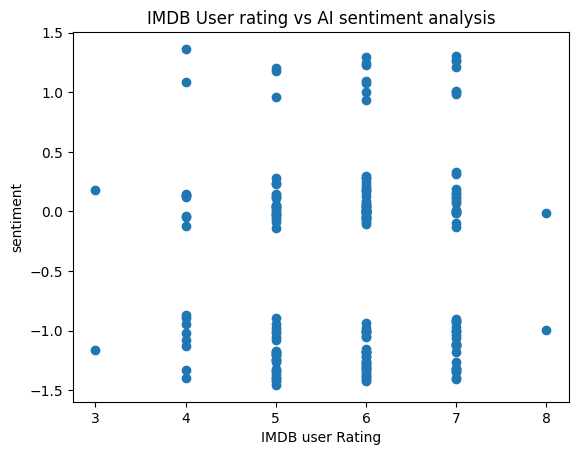

In [16]:
from matplotlib import pyplot as plt
plt.scatter(unified_view['user_rating'],unified_view['sentiment'])
plt.title('IMDB User rating vs AI sentiment analysis')
plt.xlabel('IMDB user Rating')
plt.ylabel('sentiment')

In [21]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Most movies in 2000 got 6 out of 10 in user rating 

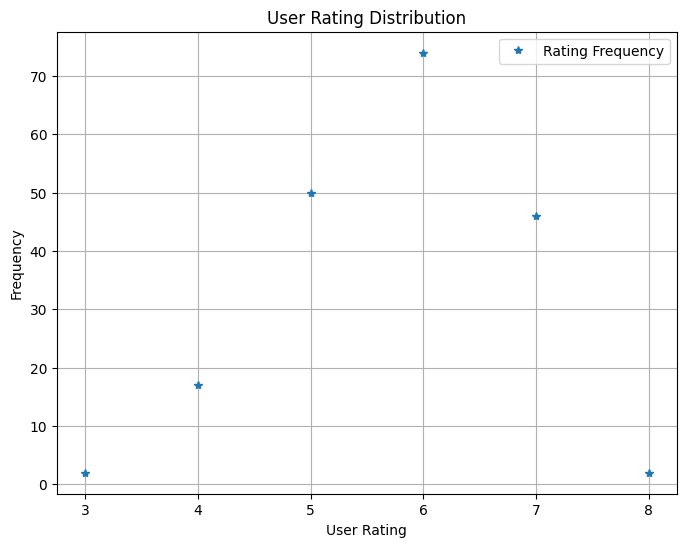

In [18]:
from matplotlib import pyplot as plt

# Group by user ratings and count their occurrences
rating_distribution = unified_view['user_rating'].value_counts().sort_index()

# Plot the frequency distribution
plt.figure(figsize=(8, 6))
plt.title('User Rating Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.plot(rating_distribution, '*', label='Rating Frequency')
plt.legend()
plt.grid(True)
plt.show()

Most of movies get 6 as a user rating

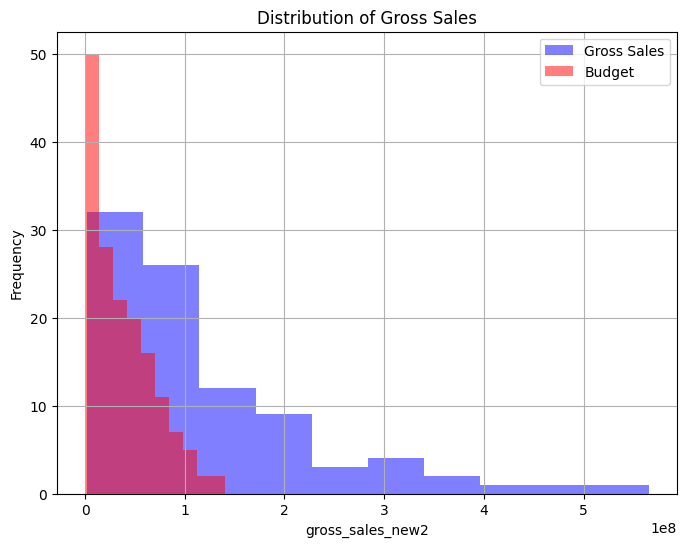

In [40]:
import matplotlib.pyplot as plt  
# Define the column to plot  
column = 'gross_sales_new2'  
  
# Create the histogram  
plt.figure(figsize=(8, 6))  
plt.hist(unified_view['gross_sales_new2'], bins=10, alpha=0.5, color='blue', label='Gross Sales')  
plt.hist(unified_view['budget_new'], bins=10, alpha=0.5, color='red', label='Budget')  
plt.legend()  
plt.xlabel(column)  
plt.ylabel('Frequency')  
plt.title('Distribution of Gross Sales')  
plt.grid(True)  
plt.show()


This code creates a histogram showing the distribution of gross sales for movies released in 2000. The x-axis represents the gross sales, and the y-axis represents the frequency of each bin